In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
labels = {"FALSE POSITIVE": 0, "CONFIRMED": 1, "CANDIDATE": 2}

df["koi_disposition_label"] = [labels[x] for x in df.koi_disposition]
df = df.drop("koi_disposition", axis=1)

df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


In [5]:
len(df)

6991

In [6]:
df2 = df[0:3500]

In [7]:
corrs = df2.corr()
corrs

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
koi_fpflag_nt,1.000000,-0.090202,0.093291,0.071426,0.234501,0.230016,-0.230016,0.063867,0.112405,-0.112405,...,-0.122777,0.072188,-0.041544,0.051664,0.059235,-0.098678,0.056508,-0.053868,-0.067149,-0.264523
koi_fpflag_ss,-0.090202,1.000000,0.335909,0.277005,-0.042734,-0.040564,0.040564,0.052034,-0.089136,0.089136,...,-0.039210,0.067526,-0.141665,0.054165,0.070765,-0.073261,0.089831,-0.061110,0.016864,-0.508676
koi_fpflag_co,0.093291,0.335909,1.000000,0.561074,-0.114620,-0.030773,0.030773,-0.038200,0.022280,-0.022280,...,-0.027649,0.073581,-0.195773,0.039847,0.093933,-0.072298,0.179243,-0.111438,0.046633,-0.628041
koi_fpflag_ec,0.071426,0.277005,0.561074,1.000000,-0.093865,-0.022919,0.022919,-0.014064,0.035035,-0.035035,...,-0.018344,0.060922,-0.124925,0.042063,0.046195,-0.061912,0.082319,-0.042919,0.028413,-0.447488
koi_period,0.234501,-0.042734,-0.114620,-0.093865,1.000000,0.477436,-0.477436,0.365870,0.140987,-0.140987,...,-0.030796,0.003909,-0.005321,-0.007023,-0.010779,0.010964,-0.020305,-0.017060,-0.011692,0.047073
koi_period_err1,0.230016,-0.040564,-0.030773,-0.022919,0.477436,1.000000,-1.000000,0.209300,0.294634,-0.294634,...,-0.001823,0.003062,-0.077752,-0.004400,0.007677,0.004245,-0.010036,-0.035930,0.002423,-0.018630
koi_period_err2,-0.230016,0.040564,0.030773,0.022919,-0.477436,-1.000000,1.000000,-0.209300,-0.294634,0.294634,...,0.001823,-0.003062,0.077752,0.004400,-0.007677,-0.004245,0.010036,0.035930,-0.002423,0.018630
koi_time0bk,0.063867,0.052034,-0.038200,-0.014064,0.365870,0.209300,-0.209300,1.000000,-0.004036,0.004036,...,0.044991,-0.050614,-0.018711,-0.023369,-0.019045,0.036606,0.000693,-0.035563,0.104869,-0.015210
koi_time0bk_err1,0.112405,-0.089136,0.022280,0.035035,0.140987,0.294634,-0.294634,-0.004036,1.000000,-1.000000,...,-0.046805,0.044918,-0.079519,0.019578,0.046030,-0.033880,0.003514,-0.037327,-0.015411,0.050025
koi_time0bk_err2,-0.112405,0.089136,-0.022280,-0.035035,-0.140987,-0.294634,0.294634,0.004036,-1.000000,1.000000,...,0.046805,-0.044918,0.079519,-0.019578,-0.046030,0.033880,-0.003514,0.037327,0.015411,-0.050025


In [8]:
features = list(corrs["koi_disposition_label"].loc[abs(corrs["koi_disposition_label"]) > .1].index)
features = features[0:len(features)-1]
features

['koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_impact',
 'koi_impact_err1',
 'koi_depth',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg_err2',
 'ra']

In [9]:
 target_col = "koi_disposition_label"

In [10]:
#split the data
data = df2[features]
target = df2[target_col]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target, test_size=0.2) #stratify for unequal target weights

In [11]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
print(f"Training Rows: {len(y_train)}")
print(f"Testing Rows: {len(y_test)}")

Training Rows: 2800
Testing Rows: 700


# Linear Models

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       206
           1       0.68      0.94      0.79       326
           2       0.63      0.16      0.26       168

    accuracy                           0.77       700
   macro avg       0.76      0.70      0.67       700
weighted avg       0.75      0.77      0.72       700


Confusion Matrix:
[[204   2   0]
 [  5 305  16]
 [  2 139  27]]

ROC Curve:


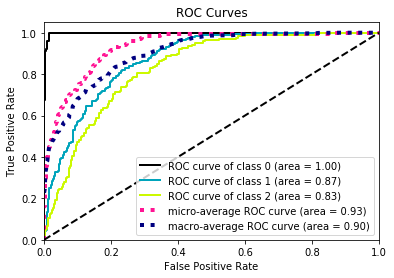

In [13]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

k: 1, Train/Test Score: 1.000/0.719
k: 3, Train/Test Score: 0.858/0.759
k: 5, Train/Test Score: 0.823/0.771
k: 7, Train/Test Score: 0.809/0.779
k: 9, Train/Test Score: 0.807/0.784
k: 11, Train/Test Score: 0.794/0.789
k: 13, Train/Test Score: 0.787/0.786
k: 15, Train/Test Score: 0.786/0.794
k: 17, Train/Test Score: 0.780/0.786
k: 19, Train/Test Score: 0.780/0.784


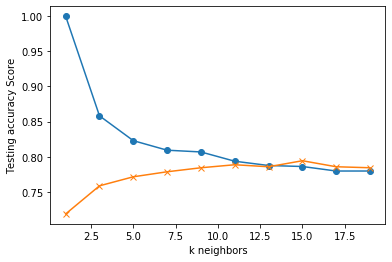

In [14]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       206
           1       0.70      0.94      0.80       326
           2       0.70      0.23      0.34       168

    accuracy                           0.78       700
   macro avg       0.79      0.72      0.71       700
weighted avg       0.78      0.78      0.75       700


Confusion Matrix:
[[206   0   0]
 [  5 305  16]
 [  2 128  38]]

ROC Curve:


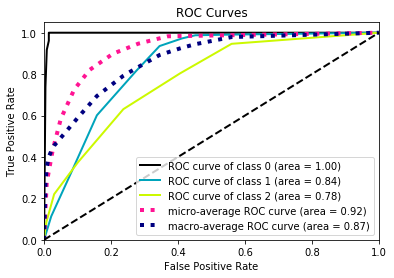

In [15]:
#KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

SVM Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       206
           1       0.67      0.98      0.79       326
           2       0.83      0.06      0.11       168

    accuracy                           0.76       700
   macro avg       0.82      0.68      0.63       700
weighted avg       0.80      0.76      0.69       700


Confusion Matrix:
[[206   0   0]
 [  6 318   2]
 [  2 156  10]]

ROC Curve:


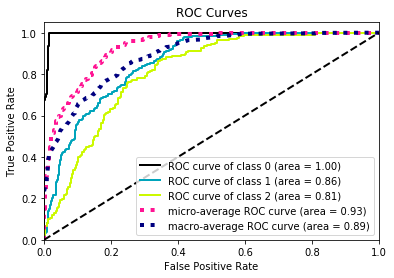

In [16]:
#SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

#  Ensemble/Tree Models

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       206
           1       0.80      0.76      0.78       326
           2       0.59      0.64      0.62       168

    accuracy                           0.80       700
   macro avg       0.79      0.80      0.79       700
weighted avg       0.80      0.80      0.80       700


Confusion Matrix:
[[204   2   0]
 [  4 248  74]
 [  0  60 108]]

ROC Curve:


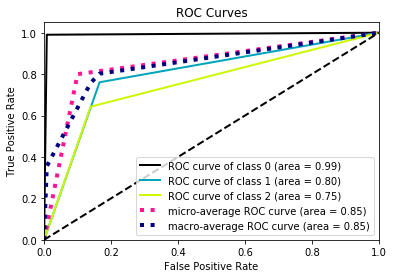

In [17]:
#Decision Tree
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       206
           1       0.78      0.85      0.81       326
           2       0.67      0.53      0.59       168

    accuracy                           0.82       700
   macro avg       0.81      0.79      0.80       700
weighted avg       0.81      0.82      0.81       700


Confusion Matrix:
[[205   1   0]
 [  5 277  44]
 [  2  77  89]]

ROC Curve:


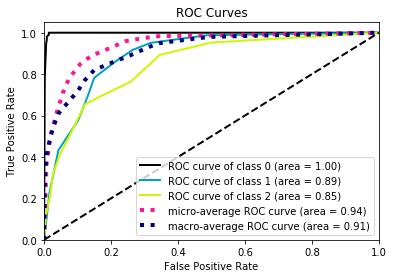

In [18]:
#Bagging Classifier
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       206
           1       0.80      0.88      0.84       326
           2       0.72      0.58      0.64       168

    accuracy                           0.84       700
   macro avg       0.84      0.82      0.82       700
weighted avg       0.84      0.84      0.84       700


Confusion Matrix:
[[205   1   0]
 [  2 287  37]
 [  2  69  97]]

ROC Curve:


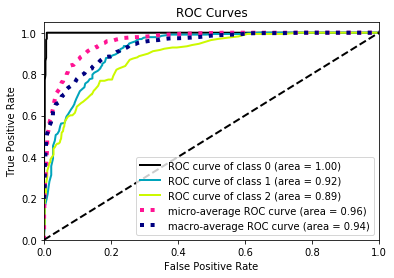

In [19]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Ada Boost Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       206
           1       0.65      0.68      0.66       326
           2       0.45      0.50      0.48       168

    accuracy                           0.68       700
   macro avg       0.69      0.66      0.67       700
weighted avg       0.70      0.68      0.68       700


Confusion Matrix:
[[167  39   0]
 [  3 222 101]
 [  2  82  84]]

ROC Curve:


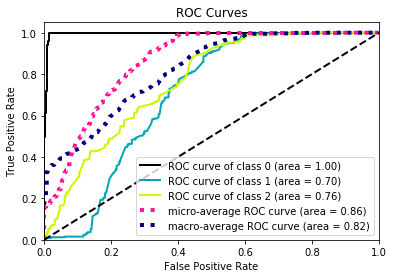

In [20]:
#Ada Boost Classifier
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       206
           1       0.80      0.87      0.83       326
           2       0.72      0.57      0.63       168

    accuracy                           0.84       700
   macro avg       0.83      0.81      0.82       700
weighted avg       0.83      0.84      0.83       700


Confusion Matrix:
[[206   0   0]
 [  5 284  37]
 [  2  71  95]]

ROC Curve:


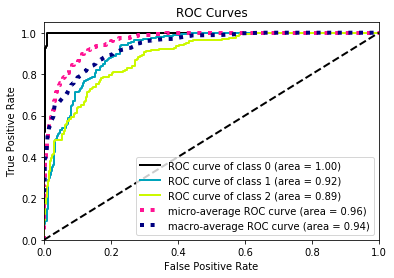

In [21]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       206
           1       0.81      0.85      0.83       326
           2       0.70      0.60      0.64       168

    accuracy                           0.83       700
   macro avg       0.82      0.81      0.82       700
weighted avg       0.83      0.83      0.83       700


Confusion Matrix:
[[206   0   0]
 [  6 277  43]
 [  2  66 100]]

ROC Curve:


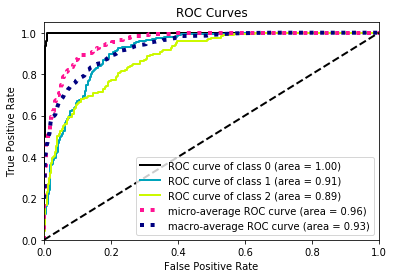

In [22]:
#XTREME Gradient Boosting Classifier
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [23]:
#Random Forest Feature Importances
sorted(list(zip(rfc.feature_importances_, data.columns)))

[(0.008847165733716146, 'koi_tce_plnt_num'),
 (0.026051701953512682, 'koi_fpflag_nt'),
 (0.02821195596964833, 'koi_slogg_err2'),
 (0.03245470682982807, 'koi_steff'),
 (0.034113798358489635, 'koi_impact_err1'),
 (0.03716280672979247, 'ra'),
 (0.04022371828926664, 'koi_prad_err1'),
 (0.04222093707973774, 'koi_depth'),
 (0.044267552606264006, 'koi_prad_err2'),
 (0.050702018659650995, 'koi_steff_err1'),
 (0.0550849128053325, 'koi_teq'),
 (0.05575205188316598, 'koi_impact'),
 (0.056793810643230636, 'koi_steff_err2'),
 (0.0636611727584942, 'koi_prad'),
 (0.06394067314304566, 'koi_fpflag_ec'),
 (0.07553058637449991, 'koi_fpflag_ss'),
 (0.1182963865153672, 'koi_model_snr'),
 (0.16668404366695738, 'koi_fpflag_co')]

# Model Selection

In [24]:
data.drop(['koi_tce_plnt_num', 'koi_fpflag_nt', 'koi_slogg_err2', 'koi_steff', 'koi_impact_err1', 'ra'], axis=1)

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_impact,koi_depth,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2
0,0,0,0,0.586,874.8,2.83,0.32,-0.19,443,25.8,81,-81
1,1,0,0,0.969,10829.0,14.60,3.92,-1.31,638,76.3,158,-176
2,1,0,0,1.276,8079.2,33.46,8.50,-2.83,1395,505.6,157,-174
3,0,0,0,0.701,603.3,2.75,0.88,-0.35,1406,40.9,169,-211
4,0,0,0,0.762,686.0,2.77,0.90,-0.30,1160,40.2,189,-232
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,1,0,0,0.558,348780.0,109.72,25.32,-46.99,1608,608.9,183,-166
3496,1,0,0,0.625,102290.0,21.93,2.14,-1.96,358,1597.3,174,-174
3497,1,0,0,1.121,190900.0,61.54,2.93,-5.34,633,879.2,156,-156
3498,1,1,1,1.039,83326.0,51.77,17.86,-5.61,1042,154.4,175,-197


In [25]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(data)
X_scaled_prod = X_scaler_prod.transform(data)

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1632
           2       1.00      1.00      1.00       838

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Confusion Matrix:
[[1030    0    0]
 [   0 1632    0]
 [   0    0  838]]

ROC Curve:


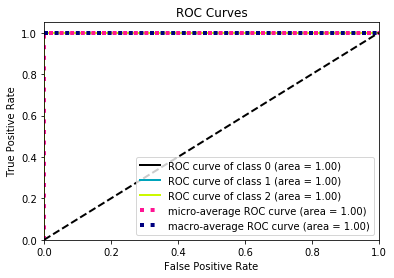

In [26]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_scaled_prod, target) #fit
preds = rfc.predict(X_scaled_prod) #predict
proba_preds = rfc.predict_proba(X_scaled_prod) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(target, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(target, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(target, proba_preds) 
plt.show()

# Save Scaler & Model

In [27]:
import pickle

#save the scaler
filename = 'exoplanet_exploration_scaler.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))

In [28]:
#save the model
filename = 'exoplanet_exploration_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

#  Make TEST Predictions

In [29]:
test = df[features][3501:] 
len(test)

3490

In [30]:
 test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 3501 to 6990
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_fpflag_nt     3490 non-null   int64  
 1   koi_fpflag_ss     3490 non-null   int64  
 2   koi_fpflag_co     3490 non-null   int64  
 3   koi_fpflag_ec     3490 non-null   int64  
 4   koi_impact        3490 non-null   float64
 5   koi_impact_err1   3490 non-null   float64
 6   koi_depth         3490 non-null   float64
 7   koi_prad          3490 non-null   float64
 8   koi_prad_err1     3490 non-null   float64
 9   koi_prad_err2     3490 non-null   float64
 10  koi_teq           3490 non-null   int64  
 11  koi_model_snr     3490 non-null   float64
 12  koi_tce_plnt_num  3490 non-null   int64  
 13  koi_steff         3490 non-null   int64  
 14  koi_steff_err1    3490 non-null   int64  
 15  koi_steff_err2    3490 non-null   int64  
 16  koi_slogg_err2    3490 non-null   float

In [31]:
loaded_scaler = pickle.load(open('exoplanet_exploration_scaler.sav', 'rb'))
loaded_model = pickle.load(open('exoplanet_exploration_model.sav', 'rb'))

In [35]:
newData_scaled = loaded_scaler.transform(test)
probs_test = loaded_model.predict_proba(newData_scaled)
probs_test #"FALSE POSITIVE": 0, "CONFIRMED": 1, "CANDIDATE": 2

array([[0.02, 0.22, 0.76],
       [0.92, 0.01, 0.07],
       [0.01, 0.12, 0.87],
       ...,
       [0.02, 0.31, 0.67],
       [0.98, 0.  , 0.02],
       [0.99, 0.01, 0.  ]])

In [48]:
results = pd.DataFrame(probs_test, columns = ['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'])
results

,FALSE POSITIVE,CONFIRMED,CANDIDATE
0,0.02,0.22,0.76
1,0.92,0.01,0.07
2,0.01,0.12,0.87
3,0.97,0.01,0.02
4,0.02,0.35,0.63
5,0.97,0.02,0.01
6,0.01,0.53,0.46
7,0.14,0.07,0.79
8,0.00,0.56,0.44
9,0.02,0.42,0.56
